In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import matplotlib.pyplot as plt
import os
import urllib
import random
import scipy.io as sio
%matplotlib inline
print "Done"

/Users/thalles/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Done


In [2]:
#from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

url = 'http://ufldl.stanford.edu/housenumbers/'

def maybe_download(filename):
  """Download a file if not present"""
  if not os.path.exists(filename):
    filename, _ = urllib.urlretrieve(url + filename, filename)
    print filename, "download completed."
  else:
    print 'Filename:', filename, 'is already downloaded.'
  return filename

# download the datasets if necessary
train_dataset_filename = maybe_download("train_32x32.mat")
test_dataset_filename = maybe_download("test_32x32.mat")
extra_dataset_filename = maybe_download("extra_32x32.mat")

Filename: train_32x32.mat is already downloaded.
Filename: test_32x32.mat is already downloaded.
Filename: extra_32x32.mat is already downloaded.


In [3]:
traning_size = 73257
testing_size = 26032
extra_size = 531131

raw_train_data = sio.loadmat(train_dataset_filename)
raw_test_data = sio.loadmat(test_dataset_filename)
raw_extra_data = sio.loadmat(extra_dataset_filename)

train_dataset, train_labels =  raw_train_data["X"], raw_train_data["y"]
test_dataset, test_labels = raw_test_data["X"], raw_test_data["y"]
extra_dataset, extra_labels = raw_extra_data["X"], raw_extra_data["y"]


# free up memory from the notebook cache
%xdel raw_train_data
%xdel raw_test_data
%xdel raw_extra_data

print "Train dataset shape:", train_dataset.shape
print "Train labels shape:",train_labels.shape
print "Test dataset shape:",test_dataset.shape
print "Test labels shape:",test_labels.shape
print "Extra dataset shape:",extra_dataset.shape
print "Extra labels shape:",extra_labels.shape

Train dataset shape: (32, 32, 3, 73257)
Train labels shape: (73257, 1)
Test dataset shape: (32, 32, 3, 26032)
Test labels shape: (26032, 1)
Extra dataset shape: (32, 32, 3, 531131)
Extra labels shape: (531131, 1)


[9]
[5]


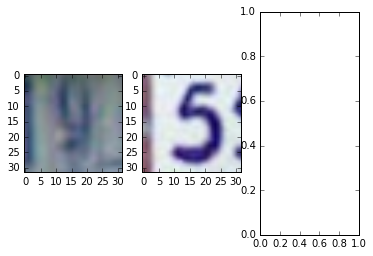

In [4]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3)

back_data = train_dataset
back_labels = train_labels

#i = random.randrange(0,back_labels.shape[0])
img = back_data[:,:,:,34426]
ax1.imshow(img, cmap=plt.cm.Greys);
print back_labels[34426]

#i = random.randrange(0,back_labels.shape[0])
img = back_data[:,:,:,55132]
ax2.imshow(img, cmap=plt.cm.Greys);
print back_labels[55132]

In [23]:
BATCH_SIZE=64
IMAGE_SIZE=32
N_CHANNELS=1
NUM_LABELS=10
PIXEL_DEPTH=255
VALIDATION_DATASET_SIZE=5000
TEST_DATASET_SIZE=10000

In [6]:
# image_size = 32  # Pixel width and height.
# number_of_channels = 3

# def reshape_dataset(data, n_of_images):
#     dataset = np.ndarray(shape=(n_of_images, image_size, image_size, number_of_channels), dtype=np.uint8) 
#     for index in range(0,n_of_images):
#         dataset[index,:,:,:] = data[:,:,:,index]
#     return dataset

# train_dataset = reshape_dataset(train_dataset, traning_size)
# test_dataset = reshape_dataset(test_dataset, testing_size)
# test_dataset = reshape_dataset(test_dataset, testing_size)

# print "Train dataset shape:", train_dataset.shape
# print "Train labels shape:",train_labels.shape
# print "Test dataset shape:",test_dataset.shape
# print "Test labels shape:",test_labels.shape

In [7]:
# _, (ax1, ax2) = plt.subplots(1, 2)

# #i = random.randrange(0,back_labels.shape[0])
# img = train_dataset[45452,:,:]
# print img.shape
# ax1.imshow(img, cmap=plt.cm.Greys);
# print train_labels[45452]

# #i = random.randrange(0,labels.shape[0])
# #print "Image index:",i
# img = train_dataset[55132,:,:]
# ax2.imshow(img, cmap=plt.cm.Greys);
# print train_labels[55132]

In [8]:
# for index in range(0,traning_size):
#     if train_labels[index] == 10:
#         train_labels[index] = 0
        
# for index in range(0,test_labels.size):
#     if test_labels[index] == 10:
#         test_labels[index] = 0

# # reshape the labels to be 1-D array
# train_labels = train_labels.reshape(train_labels.size)
# test_labels = test_labels.reshape(test_labels.size)

# print "Train labels re-shaped to 1-D:",train_labels.shape
# print "Test labels re-shaped to 1-D:",test_labels.shape

In [9]:
# _, (ax1, ax2) = plt.subplots(1, 2)

# #i = random.randrange(0,back_labels.shape[0])
# img = train_dataset[46212,:,:]
# print img.shape
# ax1.imshow(img, cmap=plt.cm.Greys);
# print train_labels[46212]

# #i = random.randrange(0,labels.shape[0])
# #print "Image index:",i
# img = train_dataset[55132,:,:]
# ax2.imshow(img, cmap=plt.cm.Greys);
# print train_labels[55132]

In [10]:
# verify if the data is well balanced across the classes
def display_data_distribution(labels):
    data_distribution = np.bincount(labels)

    index = np.arange(10)
    plt.bar(index, data_distribution)
    plt.title("Display the number of Samples per class label")
    plt.xlabel('Classes')
    plt.ylabel('Samples')

    bar_width = 0.35
    plt.xticks(index + bar_width, ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9'))

    plt.show()
    
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [11]:
NEW_DATASET_SIZE = 80000
dataset = np.zeros(shape=(NEW_DATASET_SIZE, IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS), dtype=np.float32)
labels = np.zeros(shape=(NEW_DATASET_SIZE, 1), dtype=np.uint8)

distribution = [0,0,0,0,0,0,0,0,0,0,0]
SAMPLE_LIMIT_PER_CLASS = NEW_DATASET_SIZE / 10
new_data_index = 0

for img_index in range(0,train_labels.shape[0]):
    current_label = train_labels[img_index]
    if distribution[current_label] < SAMPLE_LIMIT_PER_CLASS:
        current_img = train_dataset[:,:,:,img_index]
        current_img = rgb2gray(current_img)
        current_img = (current_img - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH # normilize
        dataset[new_data_index,:,:,:] = current_img.reshape(IMAGE_SIZE,IMAGE_SIZE,N_CHANNELS)
        labels[new_data_index,:] = current_label
        distribution[current_label] += 1
        new_data_index += 1
    
for img_index in range(0,test_labels.shape[0]):
    current_label = test_labels[img_index]
    if distribution[current_label] < SAMPLE_LIMIT_PER_CLASS:
        current_img = test_dataset[:,:,:,img_index]
        current_img = rgb2gray(current_img)
        current_img = (current_img - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH # normilize
        dataset[new_data_index,:,:,:] = current_img.reshape(IMAGE_SIZE,IMAGE_SIZE,N_CHANNELS)
        labels[new_data_index,:] = current_label
        distribution[current_label] += 1
        new_data_index += 1

for img_index in range(0,extra_labels.shape[0]):
    current_label = extra_labels[img_index]
    if distribution[current_label] < SAMPLE_LIMIT_PER_CLASS:
        current_img = extra_dataset[:,:,:,img_index]
        current_img = rgb2gray(current_img)
        current_img = (current_img - (PIXEL_DEPTH / 2.0)) / PIXEL_DEPTH # normilize
        dataset[new_data_index,:,:,:] = current_img.reshape(IMAGE_SIZE,IMAGE_SIZE,N_CHANNELS)
        labels[new_data_index,:] = current_label
        distribution[current_label] += 1
        new_data_index += 1
        
# free up memory from the notebook cache
%xdel train_dataset
%xdel train_labels
%xdel test_dataset
%xdel test_labels
%xdel extra_dataset
%xdel extra_labels

print "Done"

/Users/thalles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/thalles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/thalles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/thalles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/thalles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:33: DeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
/Users/thalles/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:39: DeprecationW

In [12]:
for index in range(0,dataset.shape[0]):
    if labels[index] == 10:
        labels[index] = 0
print "Done"

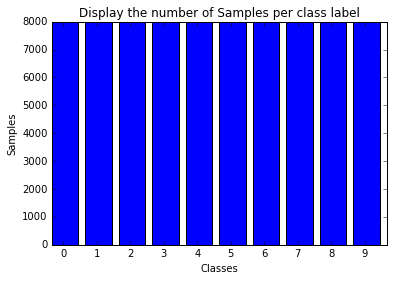

In [13]:
display_data_distribution(labels.reshape(NEW_DATASET_SIZE))

Image index: 31575
[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
Image index: 51399
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Image index: 61887
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


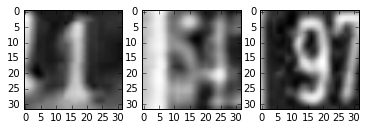

In [45]:
import random

_, (ax1, ax2, ax3) = plt.subplots(1, 3)

i = random.randrange(0,labels.shape[0])
print "Image index:",i
img = dataset[i,:,:]
ax1.imshow(img.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap=plt.cm.Greys);
print labels[i]

i = random.randrange(0,labels.shape[0])
print "Image index:",i
img = dataset[i,:,:]
ax2.imshow(img.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap=plt.cm.Greys);
print labels[i]

i = random.randrange(0,labels.shape[0])
print "Image index:",i
img = dataset[i,:,:]
ax3.imshow(img.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap=plt.cm.Greys);
print labels[i]

In [21]:
image_size = 32
num_labels = 10
depth = 3

def reformat(dataset, labels):
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels

labels = labels.reshape(labels.shape[0])
dataset, labels = reformat(dataset, labels)
#valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
#test_dataset, test_labels = reformat(test_dataset_gs, test_labels)
print('Dataset', dataset.shape, labels.shape)
#print('Validation set', valid_dataset.shape, valid_labels.shape)
#print('Test set', test_dataset.shape, test_labels.shape)

('Dataset', (80000, 32, 32, 1), (80000, 10))


[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


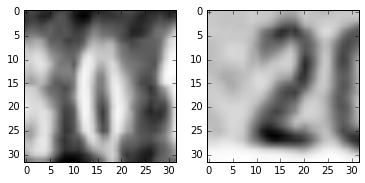

In [22]:
_, (ax1, ax2) = plt.subplots(1, 2)

img = dataset[52,:,:]
ax1.imshow(img.reshape(32,32), cmap=plt.cm.Greys);
print labels[52]

img = dataset[19757,:,:]
ax2.imshow(img.reshape(32,32), cmap=plt.cm.Greys);
print labels[19757]

In [24]:
from sklearn.cross_validation import train_test_split

train_dataset, test_dataset, train_labels, test_labels = train_test_split(
         dataset, labels, test_size=TEST_DATASET_SIZE, random_state=42)

train_dataset, valid_dataset, train_labels, valid_labels = train_test_split(
         train_dataset, train_labels, test_size=VALIDATION_DATASET_SIZE, random_state=42)

In [25]:
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

('Training set', (65000, 32, 32, 1), (65000, 10))
('Validation set', (10000, 32, 32, 1), (10000, 10))
('Test set', (5000, 32, 32, 1), (5000, 10))


In [31]:
x = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS], name="train_dataset_planceholder")

y_ = tf.placeholder(tf.float32, shape=[BATCH_SIZE, NUM_LABELS], name="train_labels_placeholder")

tf_valid_dataset = tf.constant(valid_dataset, name="validation_dataset")
tf_valid_dataset = tf.cast(tf_valid_dataset, tf.float32)

tf_test_dataset = tf.constant(test_dataset, name="test_dataset")

In [32]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(value=0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
print "Done"

Done


In [33]:
W_conv1 = weight_variable([5, 5, N_CHANNELS, 32])
b_conv1 = bias_variable([32])

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

keep_prob = tf.placeholder(tf.float32)

FC1_SIZE = 512
W_fc1 = weight_variable([8 * 8 * 64, FC1_SIZE])
b_fc1 = bias_variable([FC1_SIZE])

FC2_SIZE = 1024
W_fc2 = weight_variable([FC1_SIZE, FC2_SIZE])
b_fc2 = bias_variable([FC2_SIZE])

read_output_layer = weight_variable([FC2_SIZE, NUM_LABELS])
read_output_bias = bias_variable([NUM_LABELS])

In [34]:
def model(x_image):    
    h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
    h_pool1 = max_pool_2x2(h_conv1)

    h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
    h_pool2 = max_pool_2x2(h_conv2)

    shape = h_pool2.get_shape().as_list()  
    h_pool2_flat = tf.reshape(h_pool2, [-1, shape[1] * shape[2] * shape[3]])
    
    # First fully connected layer
    h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
    #h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
    
    # Second fully connected layer
    h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2)
    #h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

    return tf.matmul(h_fc2, read_output_layer) + read_output_bias

In [35]:
logits = model(x)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y_))

# apply L2 regularization of the trained weights
# regularizers = tf.nn.l2_loss(W_fc1) + tf.nn.l2_loss(W_fc2)
# loss += 1e-4 * regularizers 

# Add a scalar summary for the snapshot loss.
tf.scalar_summary(loss.op.name, loss)

# Create a variable to track the global step.
global_step = tf.Variable(0, name='global_step', trainable=False)

optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss, global_step=global_step)

# Predictions for the minibatch, validation set and test set.
train_prediction = tf.nn.softmax(logits)
valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
test_prediction = tf.nn.softmax(model(tf_test_dataset))

print "Done"

Done


In [36]:
# Create a new interactive session that we'll use in
# subsequent code cells.
s = tf.InteractiveSession()

# Use our newly created session as the default for 
# subsequent operations.
s.as_default()

# Initialize all the variables we defined above.
tf.initialize_all_variables().run()

Exception AssertionError: AssertionError() in <bound method InteractiveSession.__del__ of <tensorflow.python.client.session.InteractiveSession object at 0x12438ea10>> ignored


In [37]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [46]:
total_steps = int(train_labels.shape[0] / BATCH_SIZE)

for step in xrange(total_steps):
  offset = (step * BATCH_SIZE) % (train_labels.shape[0] - BATCH_SIZE)
  batch_data = train_dataset[offset:(offset + BATCH_SIZE), :, :, :]
  batch_labels = train_labels[offset:(offset + BATCH_SIZE), :]
  
  feed_dict = {x : batch_data, y_ : batch_labels, keep_prob : 0.5}
  
  # Run the graph and fetch some of the nodes.
  _, l, predictions = s.run([optimizer, loss, train_prediction], feed_dict=feed_dict)

  if step % 100 == 0:
    acc = accuracy(predictions, batch_labels)
    print('Minibatch loss at step %d: %f' % (step, l))
    print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))    #print("step %d, training accuracy %g"%(step, train_accuracy))
    print('Validation accuracy: %.1f%%' % accuracy(
           valid_prediction.eval({keep_prob : 1.0}), valid_labels))
    print ('Traning data amount used so far: %d : %d' % (offset, (offset + BATCH_SIZE)))
    print "=================================================="

Minibatch loss at step 0: 0.918900
Minibatch accuracy: 68.8%
Validation accuracy: 70.8%
Traning data amount used so far: 0 : 64
Minibatch loss at step 100: 1.218202
Minibatch accuracy: 67.2%
Validation accuracy: 73.0%
Traning data amount used so far: 6400 : 6464
Minibatch loss at step 200: 0.953187
Minibatch accuracy: 73.4%
Validation accuracy: 76.3%
Traning data amount used so far: 12800 : 12864
Minibatch loss at step 300: 0.725504
Minibatch accuracy: 82.8%
Validation accuracy: 77.4%
Traning data amount used so far: 19200 : 19264
Minibatch loss at step 400: 0.714705
Minibatch accuracy: 73.4%
Validation accuracy: 78.0%
Traning data amount used so far: 25600 : 25664
Minibatch loss at step 500: 0.428972
Minibatch accuracy: 92.2%
Validation accuracy: 78.6%
Traning data amount used so far: 32000 : 32064
Minibatch loss at step 600: 0.639957
Minibatch accuracy: 78.1%
Validation accuracy: 80.4%
Traning data amount used so far: 38400 : 38464
Minibatch loss at step 700: 0.630469
Minibatch accur

In [47]:
def error_rate(predictions, labels):
  """Return the error rate and confusions."""
  correct = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
  total = predictions.shape[0]

  error = 100.0 - (100 * float(correct) / float(total))

  confusions = np.zeros([10, 10], np.float32)
  bundled = zip(np.argmax(predictions, 1), np.argmax(labels, 1))
  for predicted, actual in bundled:
    confusions[predicted, actual] += 1
    
  return error, confusions

print 'Done'

Done


In [48]:
test_error, confusions = error_rate(test_prediction.eval({keep_prob : 1.0}), test_labels)
print 'Test error: %.1f%%' % test_error

Test error: 18.7%


Done


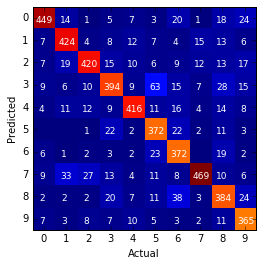

In [49]:
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(False)
plt.xticks(np.arange(NUM_LABELS))
plt.yticks(np.arange(NUM_LABELS))
plt.imshow(confusions, cmap=plt.cm.jet, interpolation='nearest');

for i, cas in enumerate(confusions):
  for j, count in enumerate(cas):
    if count > 0:
      xoff = .07 * len(str(count))
      plt.text(j-xoff, i+.2, int(count), fontsize=9, color='white')
print 'Done'